# Graph Data Task

## Importing rdflib

_rdflib_ is one of the most widely used Python libraries for working with RDF data. 
We first need to tell Python that we're going to be using rdflib, with the use of the import command.

In [ ]:
import rdflib

## Familiarising ourselves with the data

In this programming task we are going to be using a small RDF dataset about hospitals. The dataset includes information about 4 different hospitals:
* Glasgow Royal Infirmary
* Royal Infirmary of Edinburgh
* Aberdeen Royal Infirmary
* University Hospital Heidelberg

The information about each hospital may include: URI, name, number of beds, country, the fact that it is a hospital.

Here is an extract of the dataset:
<div class="alert alert-block alert-info">
<</span>http://dbpedia.org/resource/Glasgow_Royal_Infirmary>	<</span>http://www.w3.org/1999/02/22-rdf-syntax-ns#type>	<</span>http://schema.org/Hospital> . <br>
<</span>http://dbpedia.org/resource/Glasgow_Royal_Infirmary>	<</span>http://xmlns.com/foaf/0.1/name>	"Glasgow Royal Infirmary" .<br>
<</span>http://dbpedia.org/resource/Glasgow_Royal_Infirmary>	<</span>http://dbpedia.org/ontology/country>	<</span>http://dbpedia.org/resource/Scotland> .<br>
<</span>http://dbpedia.org/resource/Glasgow_Royal_Infirmary>	<</span>http://dbpedia.org/ontology/bedCount>	1077 .
</div>


### Parsing the data

The dataset is called *hospitals.ttl* and it can be found in the _readonly_ directory. <br>

Let's parse the dataset with the use of the *parse* function. You can ignore anything printed.

In [ ]:
from rdflib import Graph
g = Graph()
g.parse("./readonly/hospitals.ttl", format="ttl")

This creates a new Graph object called *g*. 

### Getting a sense of the data

We can get the number of triples in our dataset with the use of *len*. 

Run the code below (the result should be 14).

In [ ]:
len(g)

To print out all the triples in the dataset in the form of *subject predicate object*, run the code below.

Note that it is not recommended to print an entire dataset, as it may be very large! For this example it is ok, though.

In [ ]:
for s, p, o in g:
    print(s, p, o)

## Querying the data

Let's formulate SPARQL queries and run them in Python. 

Note that the general syntax for running SPARQL queries using rdflib is as follows:

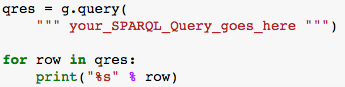

So all we need to do is substitute *your_SPARQL_Query_goes_here* with our SPARQL query. We can leave the last two code lines as they are to print out the results. In the following examples, however, we're using different printing variations, just for fun. You can ignore these if you want - or you can substitute the last line with what we have above.

### Query 1: Get the name of the Royal Infirmary of Edinburgh

We want to get the name of the resource identified through the following URI: <</span>http://dbpedia.org/resource/Royal_Infirmary_of_Edinburgh> <br><br>
One could think that this is self-evident, but there's no such thing when working with data! We want to know what the official name is for this URI, according to our data.

In [ ]:
qres = g.query(
    """SELECT ?n
       WHERE {
          <http://dbpedia.org/resource/Royal_Infirmary_of_Edinburgh>  <http://xmlns.com/foaf/0.1/name> ?n .
       }""")

for row in qres:
    print("The name of <http://dbpedia.org/resource/Royal_Infirmary_of_Edinburgh> is: %s" % row)

Suppose that we used an incorrect URI for the Royal Infirmary of Edinburgh, e.g. <</span>http://dbpedia.org/resource/Edinburgh_Royal_Infirmary>. <br> 
When running the query we wouldn't get an error, but simply no results would be returned.
This is because SPARQL doesn't know whether a URI is "correct" or not - it just searches for the information thatv we've specified. In this case, there is simlpy no triple in our data to match this query.

In [ ]:
qres = g.query(
    """SELECT ?n
       WHERE {
          <http://dbpedia.org/resource/Edinburgh_Royal_Infirmary>  <http://xmlns.com/foaf/0.1/name> ?n .
       }""")

for row in qres:
    print("The name of <http://dbpedia.org/resource/Edinburgh_Royal_Infirmary> is: %s" % row)

### Query 2: Get the URIs of all hospitals

Here we want to get the URIs of all "things" that are *of type* Hospital. There is a special term to express this: <</span>http://www.w3.org/1999/02/22-rdf-syntax-ns#type>. This is used in the SPARQL query below.

Run the following cell to get the results.

In [ ]:
qres = g.query(
    """SELECT ?h
       WHERE {
          ?h  <http://www.w3.org/1999/02/22-rdf-syntax-ns#type>  <http://schema.org/Hospital> .
       }""")

for row in qres:
    print("%s" % row)

### Query 3: Get the names of all hospitals

Now we are going to build on the previous SPARQL query to get the names of all those "things" that are of type Hospital. All we need to do is add a new triple in the WHERE-part of the query to express this.

Run the following cell to get the results.

In [ ]:
qres = g.query(
    """SELECT ?n
       WHERE {
          ?h  <http://www.w3.org/1999/02/22-rdf-syntax-ns#type>  <http://schema.org/Hospital> .
          ?h  <http://xmlns.com/foaf/0.1/name> ?n .
       }""")

for row in qres:
    print("The name of one of the hospitals in our graph database is: %s" % row)

### Query 4: Get the names of all hospitals based in Scotland

Now we are going to build even further on the previous SPARQL query to specify that those "things" (i.e. the hospitals) need to be based in Scotland. All we need to do is add a new triple in the WHERE-part of the query to express this.

Run the following cell to get the results.

In [ ]:
qres = g.query(
    """SELECT ?n
       WHERE {
          ?h  <http://www.w3.org/1999/02/22-rdf-syntax-ns#type>  <http://schema.org/Hospital> .
          ?h  <http://dbpedia.org/ontology/country>  <http://dbpedia.org/resource/Scotland> .
          ?h  <http://xmlns.com/foaf/0.1/name> ?n .
       }""")

print("The names of all hospitals in Scotland are:")
for row in qres:
    print("%s" % row)

## Have a go at querying the data

### Quiz 5 - Question 5

Here's the code that is provided in this week's quiz (Question 5). Run it to see what it does. You may also want to modify it further to get a better understanding.

In [ ]:
qres = g.query(
    """SELECT ?b
    WHERE {
    <http://dbpedia.org/resource/Glasgow_Royal_Infirmary>  <http://dbpedia.org/ontology/bedCount> ?b .
    }""")

for row in qres:
    print("The result is: %s" % row)

### Other queries of interest

Why not formulate your own SPARQL queries? You can use the starter code below. Just make sure you don't forget any quotes, curly brackets, etc.

In [ ]:
qres = g.query(
    # your SPARQL query goes here
)

for row in qres:
    print("%s" % row)